In [1]:
from pylab import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score

DATA_PATH = "D:/data/school/" # Make this the /path/to/the/data

In [2]:
data_ap = pd.read_csv(DATA_PATH + "AP__College_Board__2010_School_Level_Results.csv")

In [3]:
data_class_size = pd.read_csv(DATA_PATH + "2010-2011_Class_Size_-_School-level_detail.csv")

In [4]:
data_demographics = pd.read_csv(DATA_PATH + "School_Demographics_and_Accountability_Snapshot_2006-2012.csv")

In [5]:
data_graduation = pd.read_csv(DATA_PATH + "Graduation_Outcomes_-_Classes_Of_2005-2010_-_School_Level.csv")

In [6]:
data_hs_directory = pd.read_csv(DATA_PATH + "nysd.csv")

In [7]:
data_math_test_results = pd.read_csv(DATA_PATH + "NYS_Math_Test_Results_By_Grade_2006-2011_-_School_Level_-_All_Students.csv")

In [8]:
data_sat_results = pd.read_csv(DATA_PATH + "SAT_Results.csv")

In [9]:
data_attendance = pd.read_csv(DATA_PATH + 'School_Attendance_and_Enrollment_Statistics_by_District__2010-11_.csv')

In [10]:
data_school_grade = pd.read_csv(DATA_PATH + 'School_Progress_Report_2010-2011.csv')

In [11]:
data_diretory = pd.read_csv(DATA_PATH + "DOE_High_School_Directory_2014-2015.csv")

In [12]:
data_graduation_new = pd.read_csv(DATA_PATH + "Graduation_Outcomes_-_School_Level_-_Classes_2010-2011_-_Regents-based_Math_ELA_APM_-_Total_Cohort.csv")

In [13]:
data_ap.head()

,DBN,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5
0,01M448,UNIVERSITY NEIGHBORHOOD H.S.,39,49,10
1,01M450,EAST SIDE COMMUNITY HS,19,21,s
2,01M515,LOWER EASTSIDE PREP,24,26,24
3,01M539,"NEW EXPLORATIONS SCI,TECH,MATH",255,377,191
4,02M296,High School of Hospitality Management,s,s,s


In [14]:
data_class_size.head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN


In [15]:
data_demographics.head()

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
0,01M015,P.S. 015 ROBERTO CLEMENTE,20052006,89.4,NaN,281,15,36,40,33,...,74,26.3,189,67.3,5,1.8,158.0,56.2,123.0,43.8
1,01M015,P.S. 015 ROBERTO CLEMENTE,20062007,89.4,NaN,243,15,29,39,38,...,68,28.0,153,63.0,4,1.6,140.0,57.6,103.0,42.4
2,01M015,P.S. 015 ROBERTO CLEMENTE,20072008,89.4,NaN,261,18,43,39,36,...,77,29.5,157,60.2,7,2.7,143.0,54.8,118.0,45.2
3,01M015,P.S. 015 ROBERTO CLEMENTE,20082009,89.4,NaN,252,17,37,44,32,...,75,29.8,149,59.1,7,2.8,149.0,59.1,103.0,40.9
4,01M015,P.S. 015 ROBERTO CLEMENTE,20092010,,96.5,208,16,40,28,32,...,67,32.2,118,56.7,6,2.9,124.0,59.6,84.0,40.4


In [16]:
data_graduation.head()

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2003,5,s,s,s,s,s,...,s,s,s,s,s,s,s,s,s,s
1,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2004,55,37,67.3%,17,30.9%,45.9%,...,17,30.9%,45.9%,20,36.4%,54.1%,15,27.3%,3,5.5%
2,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2005,64,43,67.2%,27,42.2%,62.8%,...,27,42.2%,62.8%,16,25%,37.200000000000003%,9,14.1%,9,14.1%
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1%,36,46.2%,83.7%,...,36,46.2%,83.7%,7,9%,16.3%,16,20.5%,11,14.1%
4,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006 Aug,78,44,56.4%,37,47.4%,84.1%,...,37,47.4%,84.1%,7,9%,15.9%,15,19.2%,11,14.1%


In [17]:
data_hs_directory.head()

,the_geom,SchoolDist,Shape_Leng,Shape_Area
0,MULTIPOLYGON (((-73.82049919995312 40.80101146...,25,175816.081000,4.436314e+08
1,MULTIPOLYGON (((-74.02552971543656 40.65147855...,20,95513.486010,2.427230e+08
2,MULTIPOLYGON (((-73.95671863064405 40.78660079...,3,52071.976405,1.134879e+08
3,MULTIPOLYGON (((-73.92133752419399 40.80085210...,4,52056.107857,5.262001e+07
4,MULTIPOLYGON (((-73.74344992332192 40.77824115...,26,125716.377003,4.249042e+08


In [18]:
data_math_test_results.head()

,DBN,Grade,Year,Category,Number Tested,Mean Scale Score,Level 1 #,Level 1 %,Level 2 #,Level 2 %,Level 3 #,Level 3 %,Level 4 #,Level 4 %,Level 3+4 #,Level 3+4 %
0,01M015,3,2006,All Students,39,667,2,5.1%,11,28.2%,20,51.3%,6,15.4%,26,66.7%
1,01M015,3,2007,All Students,31,672,2,6.5%,3,9.7%,22,71%,4,12.9%,26,83.9%
2,01M015,3,2008,All Students,37,668,0,0%,6,16.2%,29,78.4%,2,5.4%,31,83.8%
3,01M015,3,2009,All Students,33,668,0,0%,4,12.1%,28,84.8%,1,3%,29,87.9%
4,01M015,3,2010,All Students,26,677,6,23.1%,12,46.2%,6,23.1%,2,7.7%,8,30.8%


In [19]:
data_sat_results.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384


# class size

In [20]:
def add_DBN_to_class(row):
    dbn = "{0:02d}{1}".format(row["CSD"], row["SCHOOL CODE"])
    return dbn
    
data_class_size["DBN"] = data_class_size.apply(add_DBN_to_class, axis=1)

In [21]:
data_class_size.dtypes

CSD                                       int64
BOROUGH                                  object
SCHOOL CODE                              object
SCHOOL NAME                              object
GRADE                                    object
PROGRAM TYPE                             object
CORE SUBJECT (MS CORE and 9-12 ONLY)     object
CORE COURSE (MS CORE and 9-12 ONLY)      object
SERVICE CATEGORY(K-9* ONLY)              object
NUMBER OF STUDENTS / SEATS FILLED       float64
NUMBER OF SECTIONS                      float64
AVERAGE CLASS SIZE                      float64
SIZE OF SMALLEST CLASS                  float64
SIZE OF LARGEST CLASS                   float64
DATA SOURCE                              object
SCHOOLWIDE PUPIL-TEACHER RATIO          float64
DBN                                      object
dtype: object

In [22]:
class_size_temp = data_class_size.drop(['CSD', 'BOROUGH', 'SCHOOL CODE'], 1)

In [23]:
class_size_temp.head()

,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,DBN
0,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN,01M015
1,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN,01M015
2,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01M015
3,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01M015
4,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN,01M015


In [24]:
# class_size_temp =  data_class_size
class_size_temp = class_size_temp[class_size_temp["GRADE "] == '09-12']
class_size_temp = class_size_temp[class_size_temp["PROGRAM TYPE"] == 'GEN ED']

In [25]:
class_size_temp = class_size_temp.groupby("DBN").agg(np.mean)


In [26]:
class_size_temp.head()

,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO
DBN,,,,,,
01M292,88.0000,4.000000,22.564286,18.50,26.571429,NaN
01M332,46.0000,2.000000,22.000000,21.00,23.500000,NaN
01M378,33.0000,1.000000,33.000000,33.00,33.000000,NaN
01M448,105.6875,4.750000,22.231250,18.25,27.062500,NaN
01M450,57.6000,2.733333,21.200000,19.40,22.866667,NaN


In [27]:
data_class_size = class_size_temp.reset_index()

In [28]:
data_class_size.head()

,DBN,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO
0,01M292,88.0000,4.000000,22.564286,18.50,26.571429,NaN
1,01M332,46.0000,2.000000,22.000000,21.00,23.500000,NaN
2,01M378,33.0000,1.000000,33.000000,33.00,33.000000,NaN
3,01M448,105.6875,4.750000,22.231250,18.25,27.062500,NaN
4,01M450,57.6000,2.733333,21.200000,19.40,22.866667,NaN


In [29]:
data_class_size = data_class_size[['DBN', 'AVERAGE CLASS SIZE']]
data_class_size.head()

,DBN,AVERAGE CLASS SIZE
0,01M292,22.564286
1,01M332,22.000000
2,01M378,33.000000
3,01M448,22.231250
4,01M450,21.200000


In [30]:
len(data_class_size)

583

In [31]:
data_class_size_final = data_class_size

## SAT result

In [32]:
sat_results_temp = data_sat_results.drop("Num of SAT Test Takers", 1)

In [33]:
sat_results_temp['SAT Math Avg. Score'] = sat_results_temp['SAT Math Avg. Score'].convert_objects(convert_numeric = True)
sat_results_temp['SAT Critical Reading Avg. Score'] = sat_results_temp['SAT Critical Reading Avg. Score'].convert_objects(convert_numeric = True)
sat_results_temp['SAT Writing Avg. Score'] = sat_results_temp['SAT Writing Avg. Score'].convert_objects(convert_numeric = True)

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  app.launch_new_instance()


In [34]:
sat_results_temp["Total_Avg"] = sat_results_temp.apply(lambda x: x['SAT Math Avg. Score'] + x['SAT Critical Reading Avg. Score'] + x['SAT Writing Avg. Score'], axis=1)

In [35]:
sat_results_temp.head()

,DBN,SCHOOL NAME,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,Total_Avg
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,355.0,404.0,363.0,1122.0
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,383.0,423.0,366.0,1172.0
2,01M450,EAST SIDE COMMUNITY SCHOOL,377.0,402.0,370.0,1149.0
3,01M458,FORSYTH SATELLITE ACADEMY,414.0,401.0,359.0,1174.0
4,01M509,MARTA VALLE HIGH SCHOOL,390.0,433.0,384.0,1207.0


In [36]:
sat_results_final = sat_results_temp[['DBN', 'Total_Avg']]

In [37]:
sat_results_final.head()

,DBN,Total_Avg
0,01M292,1122.0
1,01M448,1172.0
2,01M450,1149.0
3,01M458,1174.0
4,01M509,1207.0


In [38]:
len(sat_results_final)

478

# math test

In [39]:
data_math_test_results.head()

,DBN,Grade,Year,Category,Number Tested,Mean Scale Score,Level 1 #,Level 1 %,Level 2 #,Level 2 %,Level 3 #,Level 3 %,Level 4 #,Level 4 %,Level 3+4 #,Level 3+4 %
0,01M015,3,2006,All Students,39,667,2,5.1%,11,28.2%,20,51.3%,6,15.4%,26,66.7%
1,01M015,3,2007,All Students,31,672,2,6.5%,3,9.7%,22,71%,4,12.9%,26,83.9%
2,01M015,3,2008,All Students,37,668,0,0%,6,16.2%,29,78.4%,2,5.4%,31,83.8%
3,01M015,3,2009,All Students,33,668,0,0%,4,12.1%,28,84.8%,1,3%,29,87.9%
4,01M015,3,2010,All Students,26,677,6,23.1%,12,46.2%,6,23.1%,2,7.7%,8,30.8%


In [40]:
# data_required = data_required.loc[data_required['Incident Zip'] <= float(99999)]
math_test_results_temp = data_math_test_results.loc[data_math_test_results['Year'] == 2011]
math_test_results_temp = math_test_results_temp.loc[data_math_test_results['Grade'] == 'All Grades']

In [41]:
math_test_results_temp.head()

,DBN,Grade,Year,Category,Number Tested,Mean Scale Score,Level 1 #,Level 1 %,Level 2 #,Level 2 %,Level 3 #,Level 3 %,Level 4 #,Level 4 %,Level 3+4 #,Level 3+4 %
24,01M015,All Grades,2011,All Students,81,669,18,22.2%,35,43.2%,26,32.1%,2,2.5%,28,34.6%
50,01M019,All Grades,2011,All Students,112,683,4,3.6%,46,41.1%,48,42.9%,14,12.5%,62,55.4%
75,01M020,All Grades,2011,All Students,258,682,19,7.4%,87,33.7%,109,42.2%,43,16.7%,152,58.9%
117,01M034,All Grades,2011,All Students,246,673,25,10.2%,84,34.1%,104,42.3%,33,13.4%,137,55.7%
142,01M063,All Grades,2011,All Students,77,689,4,5.2%,26,33.8%,24,31.2%,23,29.9%,47,61%


In [42]:
math_test_results_temp = math_test_results_temp[['DBN', 'Mean Scale Score']]

In [43]:
math_test_results_temp.tail()

,DBN,Mean Scale Score
28334,75X186,621
28375,75X188,623
28410,75X352,635
28436,75X721,635
28477,75X723,617


In [44]:
len(math_test_results_temp)

1132

In [45]:
math_test_results_final = math_test_results_temp

# Attendance

In [46]:
data_attendance.tail()

,District,YTD % Attendance (Avg),YTD Enrollment(Avg)
30,DISTRICT 31,90.98%,59373
31,DISTRICT 32,89.28%,15297
32,SPECIAL ED DISTRICT 75,83.21%,21435
33,ALTERNATIVE HIGH SCHOOLS,63.81%,7288
34,Citywide,89.99%,1002463


In [47]:
data_attendance.dtypes

District                  object
YTD % Attendance (Avg)    object
YTD Enrollment(Avg)        int64
dtype: object

In [48]:
attendance_temp = data_attendance

In [49]:
attendance_temp['District'] = data_attendance.apply(lambda x: x['District'].replace('DISTRICT ', ''), axis=1)

In [50]:
attendance_temp = attendance_temp.drop([33, 34])

In [51]:
attendance_temp['District'] = attendance_temp.apply(lambda x: x['District'].replace('SPECIAL ED ', ''), axis=1)


In [52]:
attendance_temp.head()

,District,YTD % Attendance (Avg),YTD Enrollment(Avg)
0,01,91.18%,12367
1,02,89.01%,60823
2,03,89.28%,21962
3,04,91.13%,14252
4,05,89.08%,13170


In [53]:
attendance_temp['YTD % Attendance (Avg)'] = attendance_temp.apply(lambda x: x['YTD % Attendance (Avg)'].replace('%', ''), axis=1)

In [54]:
attendance_temp = attendance_temp.rename(columns={'YTD % Attendance (Avg)':'Avg_ttendance', 'YTD Enrollment(Avg)':'Avg_enrollment'})

In [55]:
attendance_temp.head()

,District,Avg_ttendance,Avg_enrollment
0,01,91.18,12367
1,02,89.01,60823
2,03,89.28,21962
3,04,91.13,14252
4,05,89.08,13170


In [56]:
attendance_final = attendance_temp

# AP score

In [57]:
data_ap.head()

,DBN,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5
0,01M448,UNIVERSITY NEIGHBORHOOD H.S.,39,49,10
1,01M450,EAST SIDE COMMUNITY HS,19,21,s
2,01M515,LOWER EASTSIDE PREP,24,26,24
3,01M539,"NEW EXPLORATIONS SCI,TECH,MATH",255,377,191
4,02M296,High School of Hospitality Management,s,s,s


In [58]:
len(data_ap)

258

# school grade data

In [59]:
data_school_grade

,﻿DBN,DISTRICT,SCHOOL,PRINCIPAL,PROGRESS REPORT TYPE,SCHOOL LEVEL*,PEER INDEX*,2010-2011 OVERALL GRADE,2010-2011 OVERALL SCORE,2010-2011 ENVIRONMENT CATEGORY SCORE,2010-2011 ENVIRONMENT GRADE,2010-2011 PERFORMANCE CATEGORY SCORE,2010-2011 PERFORMANCE GRADE,2010-2011 PROGRESS CATEGORY SCORE,2010-2011 PROGRESS GRADE,2010-2011 ADDITIONAL CREDIT,2009-10 PROGRESS REPORT GRADE
0,01M015,1,P.S. 015 Roberto Clemente,Irene Sanchez,EMS,Elementary,63.61,C,27.0,6.4,B,2.1,D,18.0,C,0.5,C
1,01M019,1,P.S. 019 Asher Levy,Jacqueline Flanagan,EMS,Elementary,49.48,B,48.7,7.8,B,5.2,D,35.1,A,0.5,C
2,01M020,1,P.S. 020 Anna Silver,James Lee,EMS,Elementary,56.65,B,48.2,7.7,B,7.4,C,31.1,B,2.0,A
3,01M034,1,P.S. 034 Franklin D. Roosevelt,Joyce Stallings Harte,EMS,K-8,67.97,C,39.8,7.5,B,11.3,B,18.5,C,2.5,B
4,01M063,1,P.S. 063 William McKinley,Darlene Despeignes,EMS,Elementary,58.85,B,49.0,8.1,B,10.4,B,29.0,B,1.5,B
5,01M064,1,P.S. 064 Robert Simon,Marlon L. Hosang,EMS,Elementary,60.73,C,25.8,9.7,A,4.5,D,11.6,D,0.0,C
6,01M110,1,P.S. 110 Florence Nightingale,Karen Feuer,EMS,Elementary,40.85,C,38.1,4.1,C,10.9,B,22.1,C,1.0,D
7,01M134,1,P.S. 134 Henrietta Szold,Loretta Caputo,EMS,Elementary,54.33,C,34.6,4.2,C,5.9,C,24.0,C,0.5,B
8,01M137,1,P.S. 137 John L. Bernstein,Melissa Rodriguez,EMS,Elementary,57.88,F,17.6,5.1,C,4.8,D,6.7,F,1.0,C
9,01M140,1,P.S. 140 Nathan Straus,Esteban Barrientos,EMS,K-8,61.28,D,23.6,8.4,B,5.1,D,9.6,D,0.5,B


In [60]:
len(data_school_grade)

1715

In [61]:
list(data_school_grade.columns.values)

['\ufeffDBN',
 'DISTRICT',
 'SCHOOL',
 'PRINCIPAL',
 'PROGRESS REPORT TYPE',
 'SCHOOL LEVEL*',
 'PEER INDEX*',
 '2010-2011 OVERALL GRADE',
 '2010-2011 OVERALL SCORE',
 '2010-2011 ENVIRONMENT CATEGORY SCORE',
 '2010-2011 ENVIRONMENT GRADE',
 '2010-2011 PERFORMANCE CATEGORY SCORE',
 '2010-2011 PERFORMANCE GRADE',
 '2010-2011 PROGRESS CATEGORY SCORE',
 '2010-2011 PROGRESS GRADE',
 '2010-2011 ADDITIONAL CREDIT',
 '2009-10 PROGRESS REPORT GRADE']

In [62]:
school_grade_temp = data_school_grade[data_school_grade["SCHOOL LEVEL*"] == "High School"]


In [63]:
len(school_grade_temp)

426

In [64]:
school_grade_temp

,﻿DBN,DISTRICT,SCHOOL,PRINCIPAL,PROGRESS REPORT TYPE,SCHOOL LEVEL*,PEER INDEX*,2010-2011 OVERALL GRADE,2010-2011 OVERALL SCORE,2010-2011 ENVIRONMENT CATEGORY SCORE,2010-2011 ENVIRONMENT GRADE,2010-2011 PERFORMANCE CATEGORY SCORE,2010-2011 PERFORMANCE GRADE,2010-2011 PROGRESS CATEGORY SCORE,2010-2011 PROGRESS GRADE,2010-2011 ADDITIONAL CREDIT,2009-10 PROGRESS REPORT GRADE
14,01M292,1,Henry Street School for International Studies,Erin Balet,HS,High School,1.81,C,49.8,6.9,D,12.8,C,30.1,C,NaN,D
23,01M448,1,University Neighborhood High School,Elizabeth Collins,HS,High School,2.03,C,57.6,6.9,D,13.9,C,35.8,B,1.0,C
25,01M450,1,East Side Community School,Mark Federman,HS,High School,2.26,A,77.0,12.9,A,18.4,A,38.7,B,7.0,A
27,01M509,1,Marta Valle High School,Mimi Fortunato,HS,High School,1.78,C,54.0,6.7,D,15.7,B,30.6,C,1.0,B
30,01M539,1,"New Explorations into Science, Technology and ...",Dr. Olga Livanis,HS,High School,3.48,A,71.9,7.7,C,21.8,A,42.4,A,NaN,B
32,01M696,1,Bard High School Early College,Michael Lerner,HS,High School,3.82,B,59.4,11.7,A,16.9,B,30.8,C,NaN,B
43,02M047,3,47 The American Sign Language and English Seco...,Watfa A. Shama,HS,High School,1.48,C,53.6,11.5,A,17.5,A,24.6,D,NaN,A
68,02M288,2,Food and Finance High School,Roger Turgeon,HS,High School,2.15,A,79.4,8.5,C,23.1,A,41.8,B,6.0,A
71,02M294,2,Essex Street Academy,Erin Carstensen,HS,High School,2.13,B,66.0,10.8,A,18.2,A,37.0,B,NaN,A
72,02M296,2,High School of Hospitality Management,Matthew Corallo,HS,High School,1.92,A,83.7,10.7,A,22.6,A,43.4,A,7.0,A


In [65]:
school_grade_temp = school_grade_temp.drop(["DISTRICT", "SCHOOL", "PRINCIPAL", "PROGRESS REPORT TYPE", "SCHOOL LEVEL*"], axis=1)

In [66]:
school_grade_temp.head()

,﻿DBN,PEER INDEX*,2010-2011 OVERALL GRADE,2010-2011 OVERALL SCORE,2010-2011 ENVIRONMENT CATEGORY SCORE,2010-2011 ENVIRONMENT GRADE,2010-2011 PERFORMANCE CATEGORY SCORE,2010-2011 PERFORMANCE GRADE,2010-2011 PROGRESS CATEGORY SCORE,2010-2011 PROGRESS GRADE,2010-2011 ADDITIONAL CREDIT,2009-10 PROGRESS REPORT GRADE
14,01M292,1.81,C,49.8,6.9,D,12.8,C,30.1,C,NaN,D
23,01M448,2.03,C,57.6,6.9,D,13.9,C,35.8,B,1.0,C
25,01M450,2.26,A,77.0,12.9,A,18.4,A,38.7,B,7.0,A
27,01M509,1.78,C,54.0,6.7,D,15.7,B,30.6,C,1.0,B
30,01M539,3.48,A,71.9,7.7,C,21.8,A,42.4,A,NaN,B


In [67]:
school_grade_final = school_grade_temp

In [68]:
school_grade_final = school_grade_final.rename(columns={'\ufeffDBN':'DBN'})

In [69]:
list(school_grade_final.columns.values)

['DBN',
 'PEER INDEX*',
 '2010-2011 OVERALL GRADE',
 '2010-2011 OVERALL SCORE',
 '2010-2011 ENVIRONMENT CATEGORY SCORE',
 '2010-2011 ENVIRONMENT GRADE',
 '2010-2011 PERFORMANCE CATEGORY SCORE',
 '2010-2011 PERFORMANCE GRADE',
 '2010-2011 PROGRESS CATEGORY SCORE',
 '2010-2011 PROGRESS GRADE',
 '2010-2011 ADDITIONAL CREDIT',
 '2009-10 PROGRESS REPORT GRADE']

In [70]:
len(school_grade_final)

426

In [71]:
# school_grade_final = school_grade_final.dropna()

In [72]:
# len(school_grade_final)

# graduate outcome

In [73]:
data_graduation

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2003,5,s,s,s,s,s,...,s,s,s,s,s,s,s,s,s,s
1,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2004,55,37,67.3%,17,30.9%,45.9%,...,17,30.9%,45.9%,20,36.4%,54.1%,15,27.3%,3,5.5%
2,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2005,64,43,67.2%,27,42.2%,62.8%,...,27,42.2%,62.8%,16,25%,37.200000000000003%,9,14.1%,9,14.1%
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1%,36,46.2%,83.7%,...,36,46.2%,83.7%,7,9%,16.3%,16,20.5%,11,14.1%
4,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006 Aug,78,44,56.4%,37,47.4%,84.1%,...,37,47.4%,84.1%,7,9%,15.9%,15,19.2%,11,14.1%
5,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2001,64,46,71.900000000000006%,32,50%,69.599999999999994%,...,25,39.1%,54.3%,14,21.9%,30.4%,10,15.6%,6,9.4%
6,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2002,52,33,63.5%,19,36.5%,57.6%,...,11,21.2%,33.299999999999997%,14,26.9%,42.4%,16,30.8%,1,1.9%
7,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2003,87,67,77%,39,44.8%,58.2%,...,28,32.200000000000003%,41.8%,28,32.200000000000003%,41.8%,9,10.3%,11,12.6%
8,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2004,112,75,67%,36,32.1%,48%,...,30,26.8%,40%,39,34.799999999999997%,52%,33,29.5%,4,3.6%
9,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2005,121,64,52.9%,35,28.9%,54.7%,...,31,25.6%,48.4%,29,24%,45.3%,41,33.9%,11,9.1%


In [74]:
data_graduation.dtypes

Demographic                           object
DBN                                   object
School Name                           object
Cohort                                object
Total Cohort                           int64
Total Grads - n                       object
Total Grads - % of cohort             object
Total Regents - n                     object
Total Regents - % of cohort           object
Total Regents - % of grads            object
Advanced Regents - n                  object
Advanced Regents - % of cohort        object
Advanced Regents - % of grads         object
Regents w/o Advanced - n              object
Regents w/o Advanced - % of cohort    object
Regents w/o Advanced - % of grads     object
Local - n                             object
Local - % of cohort                   object
Local - % of grads                    object
Still Enrolled - n                    object
Still Enrolled - % of cohort          object
Dropped Out - n                       object
Dropped Ou

In [75]:
len(data_graduation)

25096

# DOE High School Directory

In [76]:
data_diretory.head()

,﻿dbn,school_name,boro,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,priority02,priority03,priority04,priority05,priority06,priority07,priority08,priority09,priority10,Location 1
0,17K548,Brooklyn School for Music & Theatre,Brooklyn,K440,718-230-6250,718-230-6262,9,12,NaN,NaN,...,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"883 Classon Avenue\nBrooklyn, NY 11225\n(40.67..."
1,09X543,High School for Violin and Dance,Bronx,X400,718-842-0687,718-589-9849,9,12,NaN,NaN,...,Then to New York City residents who attend an ...,Then to Bronx students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,"1110 Boston Road\nBronx, NY 10456\n(40.8276026..."
2,09X327,Comprehensive Model School Project M.S. 327,Bronx,X240,718-294-8111,718-294-8109,6,12,NaN,NaN,...,Then to Bronx students or residents who attend...,Then to New York City residents who attend an ...,Then to Bronx students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,"1501 Jerome Avenue\nBronx, NY 10452\n(40.84241..."
3,02M280,Manhattan Early College School for Advertising,Manhattan,M520,718-935-3477,NaN,9,10,9,14.0,...,Then to New York City residents who attend an ...,Then to Manhattan students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,"411 Pearl Street\nNew York, NY 10038\n(40.7106..."
4,28Q680,Queens Gateway to Health Sciences Secondary Sc...,Queens,Q695,718-969-3155,718-969-3552,6,12,NaN,NaN,...,Then to Districts 28 and 29 students or residents,Then to Queens students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,"160-20 Goethals Avenue\nJamaica, NY 11432\n(40..."


In [77]:
data_diretory.columns.values

array(['\ufeffdbn', 'school_name', 'boro', 'building_code', 'phone_number',
       'fax_number', 'grade_span_min', 'grade_span_max',
       'expgrade_span_min', 'expgrade_span_max', 'bus', 'subway',
       'primary_address_line_1', 'city', 'state_code', 'zip', 'website',
       'total_students', 'campus_name', 'school_type',
       'overview_paragraph', 'program_highlights', 'language_classes',
       'advancedplacement_courses', 'online_ap_courses',
       'online_language_courses', 'extracurricular_activities',
       'psal_sports_boys', 'psal_sports_girls', 'psal_sports_coed',
       'school_sports', 'partner_cbo', 'partner_hospital',
       'partner_highered', 'partner_cultural', 'partner_nonprofit',
       'partner_corporate', 'partner_financial', 'partner_other',
       'addtl_info1', 'addtl_info2', 'start_time', 'end_time',
       'se_services', 'ell_programs', 'school_accessibility_description',
       'number_programs', 'priority01', 'priority02', 'priority03',
       'priorit

In [78]:
diretory_temp = data_diretory[['\ufeffdbn', 'total_students']]

In [79]:
total_students = diretory_temp.rename(columns={'\ufeffdbn':'DBN'})

In [80]:
len(total_students)

435

In [81]:
total_students.head()

,DBN,total_students
0,17K548,399.0
1,09X543,378.0
2,09X327,543.0
3,02M280,NaN
4,28Q680,811.0


### demographics

In [82]:
data_demographics

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
0,01M015,P.S. 015 ROBERTO CLEMENTE,20052006,89.4,NaN,281,15,36,40,33,...,74,26.3,189,67.3,5,1.8,158.0,56.2,123.0,43.8
1,01M015,P.S. 015 ROBERTO CLEMENTE,20062007,89.4,NaN,243,15,29,39,38,...,68,28.0,153,63.0,4,1.6,140.0,57.6,103.0,42.4
2,01M015,P.S. 015 ROBERTO CLEMENTE,20072008,89.4,NaN,261,18,43,39,36,...,77,29.5,157,60.2,7,2.7,143.0,54.8,118.0,45.2
3,01M015,P.S. 015 ROBERTO CLEMENTE,20082009,89.4,NaN,252,17,37,44,32,...,75,29.8,149,59.1,7,2.8,149.0,59.1,103.0,40.9
4,01M015,P.S. 015 ROBERTO CLEMENTE,20092010,,96.5,208,16,40,28,32,...,67,32.2,118,56.7,6,2.9,124.0,59.6,84.0,40.4
5,01M015,P.S. 015 ROBERTO CLEMENTE,20102011,,96.5,203,13,37,35,33,...,75,36.9,110,54.2,4,2.0,113.0,55.7,90.0,44.3
6,01M015,P.S. 015 ROBERTO CLEMENTE,20112012,NaN,89.4,189,13,31,35,28,...,63,33.3,109,57.7,4,2.1,97.0,51.3,92.0,48.7
7,01M019,P.S. 019 ASHER LEVY,20052006,61.5,NaN,402,15,43,55,53,...,103,25.6,207,51.5,39,9.7,214.0,53.2,188.0,46.8
8,01M019,P.S. 019 ASHER LEVY,20062007,61.5,NaN,312,13,37,45,52,...,70,22.4,172,55.1,19,6.1,157.0,50.3,155.0,49.7
9,01M019,P.S. 019 ASHER LEVY,20072008,61.5,NaN,338,28,48,46,47,...,72,21.3,186,55.0,22,6.5,162.0,47.9,176.0,52.1


In [83]:
data_demographics.dtypes

DBN                   object
Name                  object
schoolyear             int64
fl_percent            object
frl_percent          float64
total_enrollment       int64
prek                  object
k                     object
grade1                object
grade2                object
grade3                object
grade4                object
grade5                object
grade6                object
grade7                object
grade8                object
grade9                object
grade10               object
grade11               object
grade12               object
ell_num              float64
ell_percent          float64
sped_num             float64
sped_percent         float64
ctt_num               object
selfcontained_num     object
asian_num              int64
asian_per            float64
black_num              int64
black_per            float64
hispanic_num           int64
hispanic_per         float64
white_num              int64
white_per            float64
male_num      

In [84]:
len(data_demographics)

10075

In [85]:
demographics_temp = data_demographics[data_demographics['schoolyear'] == 20082009]

In [86]:
len(demographics_temp)

1441

In [87]:
demographics_required_col = ['DBN', 'male_per', 'female_per', 'asian_per', 'black_per',
                             'hispanic_per', 'white_per', 'total_enrollment']

In [88]:
demographics_temp = demographics_temp[demographics_required_col]

In [89]:
demographics_temp.head()

,DBN,male_per,female_per,asian_per,black_per,hispanic_per,white_per,total_enrollment
3,01M015,59.1,40.9,6.3,29.8,59.1,2.8,252
10,01M019,48.0,52.0,12.0,25.5,45.8,9.8,325
17,01M020,48.2,51.8,23.6,9.3,63.4,1.5,593
24,01M034,50.5,49.5,6.6,20.5,69.6,2.1,424
32,01M063,63.8,36.2,9.5,17.1,65.3,7.0,199


In [90]:
len(demographics_temp)

1441

In [91]:
demographics_temp.dtypes

DBN                  object
male_per            float64
female_per          float64
asian_per           float64
black_per           float64
hispanic_per        float64
white_per           float64
total_enrollment      int64
dtype: object

In [92]:
demographics_final = demographics_temp.dropna()

In [93]:
len(demographics_final)

1441

# Merge data

In [94]:
len(data_sat_results)

478

In [95]:
sat_class_size = pd.merge(data_class_size_final, sat_results_final, how='inner', on='DBN')

In [96]:
sat_class_size = sat_class_size.dropna()


In [97]:
len(sat_class_size)

401

In [98]:
sat_size_math = pd.merge(sat_class_size, math_test_results_final, how='inner', on='DBN')

In [99]:
sat_size_math = sat_size_math.dropna()

In [100]:
len(sat_size_math)

68

In [101]:
sat_size_math.tail()

,DBN,AVERAGE CLASS SIZE,Total_Avg,Mean Scale Score
63,29Q259,25.775000,1173.0,673
64,29Q283,23.837500,1100.0,663
65,30Q580,20.469231,1636.0,713
66,31R080,30.272222,1426.0,686
67,32K554,17.793750,1315.0,689


### merge attendence

In [102]:
sat_class_size_temp = sat_class_size

In [103]:
sat_class_size_temp['District'] = sat_class_size_temp.apply(lambda x: x['DBN'][0:2], axis=1)

In [104]:
sat_class_size_temp.tail()

,DBN,AVERAGE CLASS SIZE,Total_Avg,District
429,32K549,22.760000,1035.0,32
430,32K552,23.900000,1060.0,32
431,32K554,17.793750,1315.0,32
432,32K556,25.060000,1055.0,32
433,32K564,24.964286,1034.0,32


In [105]:
sat_class_size_temp["District"].head()

0    01
1    01
2    01
3    01
4    01
Name: District, dtype: object

In [106]:
sat_size_atte = pd.merge(sat_class_size_temp, attendance_final, how='inner', on='District')

In [107]:
sat_size_atte.head()

,DBN,AVERAGE CLASS SIZE,Total_Avg,District,Avg_ttendance,Avg_enrollment
0,01M292,22.564286,1122.0,01,91.18,12367
1,01M448,22.231250,1172.0,01,91.18,12367
2,01M450,21.200000,1149.0,01,91.18,12367
3,01M458,23.000000,1174.0,01,91.18,12367
4,01M509,23.571429,1207.0,01,91.18,12367


In [108]:
len(sat_size_atte)

401

### merge school grade

In [109]:
sat_size_atte_grade = pd.merge(sat_size_atte, school_grade_final, how='inner', on='DBN')

In [110]:
sat_size_atte_grade.head()

,DBN,AVERAGE CLASS SIZE,Total_Avg,District,Avg_ttendance,Avg_enrollment,PEER INDEX*,2010-2011 OVERALL GRADE,2010-2011 OVERALL SCORE,2010-2011 ENVIRONMENT CATEGORY SCORE,2010-2011 ENVIRONMENT GRADE,2010-2011 PERFORMANCE CATEGORY SCORE,2010-2011 PERFORMANCE GRADE,2010-2011 PROGRESS CATEGORY SCORE,2010-2011 PROGRESS GRADE,2010-2011 ADDITIONAL CREDIT,2009-10 PROGRESS REPORT GRADE
0,01M292,22.564286,1122.0,01,91.18,12367,1.81,C,49.8,6.9,D,12.8,C,30.1,C,NaN,D
1,01M448,22.231250,1172.0,01,91.18,12367,2.03,C,57.6,6.9,D,13.9,C,35.8,B,1.0,C
2,01M450,21.200000,1149.0,01,91.18,12367,2.26,A,77.0,12.9,A,18.4,A,38.7,B,7.0,A
3,01M509,23.571429,1207.0,01,91.18,12367,1.78,C,54.0,6.7,D,15.7,B,30.6,C,1.0,B
4,01M539,25.510526,1621.0,01,91.18,12367,3.48,A,71.9,7.7,C,21.8,A,42.4,A,NaN,B


In [111]:
len(sat_size_atte_grade)

364

In [112]:
grade_remove_col = ["2010-2011 OVERALL GRADE", "2010-2011 ENVIRONMENT GRADE", "2010-2011 PERFORMANCE GRADE", "2010-2011 PROGRESS GRADE", "2010-2011 ADDITIONAL CREDIT", "2009-10 PROGRESS REPORT GRADE"]

In [113]:
sat_size_atte_grade_temp = sat_size_atte_grade.drop(grade_remove_col, axis=1)

In [114]:
len(sat_size_atte_grade_temp)

364

In [115]:
sat_size_atte_grade_temp = sat_size_atte_grade_temp.dropna()

In [116]:
sat_size_atte_grade_temp = sat_size_atte_grade_temp.rename(columns={"Total_Avg":"SAT_Avg", 'Avg_ttendance':"Avg_atendance" })

In [117]:
sat_size_atte_grade_temp.head()

,DBN,AVERAGE CLASS SIZE,SAT_Avg,District,Avg_atendance,Avg_enrollment,PEER INDEX*,2010-2011 OVERALL SCORE,2010-2011 ENVIRONMENT CATEGORY SCORE,2010-2011 PERFORMANCE CATEGORY SCORE,2010-2011 PROGRESS CATEGORY SCORE
0,01M292,22.564286,1122.0,01,91.18,12367,1.81,49.8,6.9,12.8,30.1
1,01M448,22.231250,1172.0,01,91.18,12367,2.03,57.6,6.9,13.9,35.8
2,01M450,21.200000,1149.0,01,91.18,12367,2.26,77.0,12.9,18.4,38.7
3,01M509,23.571429,1207.0,01,91.18,12367,1.78,54.0,6.7,15.7,30.6
4,01M539,25.510526,1621.0,01,91.18,12367,3.48,71.9,7.7,21.8,42.4


In [118]:
sat_size_atte_grade_temp.dtypes

DBN                                      object
AVERAGE CLASS SIZE                      float64
SAT_Avg                                 float64
District                                 object
Avg_atendance                            object
Avg_enrollment                            int64
PEER INDEX*                             float64
2010-2011 OVERALL SCORE                 float64
2010-2011 ENVIRONMENT CATEGORY SCORE    float64
2010-2011 PERFORMANCE CATEGORY SCORE    float64
2010-2011 PROGRESS CATEGORY SCORE       float64
dtype: object

In [119]:
sat_size_atte_grade_temp['Avg_atendance'] = sat_size_atte_grade_temp['Avg_atendance'].convert_objects(convert_numeric = True)

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


In [120]:
sat_size_atte_grade_temp.head()

,DBN,AVERAGE CLASS SIZE,SAT_Avg,District,Avg_atendance,Avg_enrollment,PEER INDEX*,2010-2011 OVERALL SCORE,2010-2011 ENVIRONMENT CATEGORY SCORE,2010-2011 PERFORMANCE CATEGORY SCORE,2010-2011 PROGRESS CATEGORY SCORE
0,01M292,22.564286,1122.0,01,91.18,12367,1.81,49.8,6.9,12.8,30.1
1,01M448,22.231250,1172.0,01,91.18,12367,2.03,57.6,6.9,13.9,35.8
2,01M450,21.200000,1149.0,01,91.18,12367,2.26,77.0,12.9,18.4,38.7
3,01M509,23.571429,1207.0,01,91.18,12367,1.78,54.0,6.7,15.7,30.6
4,01M539,25.510526,1621.0,01,91.18,12367,3.48,71.9,7.7,21.8,42.4


### merge math to sat

In [121]:
len(math_test_results_final)


1132

In [122]:
sat_size_atte_grade_math = pd.merge(sat_size_atte_grade_temp, math_test_results_final, how='inner', on='DBN')

In [123]:
sat_size_atte_grade_math['Mean Scale Score'] = sat_size_atte_grade_math['Mean Scale Score'].convert_objects(convert_numeric = True)

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


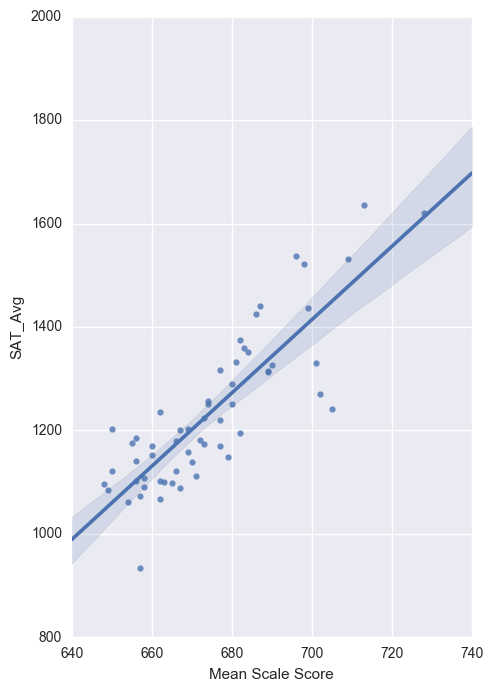

In [124]:
sns.pairplot(sat_size_atte_grade_math, x_vars=['Mean Scale Score',],
             y_vars='SAT_Avg', size=7, aspect=0.7, kind='reg')

# Visualizing data

In [125]:
list(sat_size_atte_grade_temp.columns.values)

['DBN',
 'AVERAGE CLASS SIZE',
 'SAT_Avg',
 'District',
 'Avg_atendance',
 'Avg_enrollment',
 'PEER INDEX*',
 '2010-2011 OVERALL SCORE',
 '2010-2011 ENVIRONMENT CATEGORY SCORE',
 '2010-2011 PERFORMANCE CATEGORY SCORE',
 '2010-2011 PROGRESS CATEGORY SCORE']

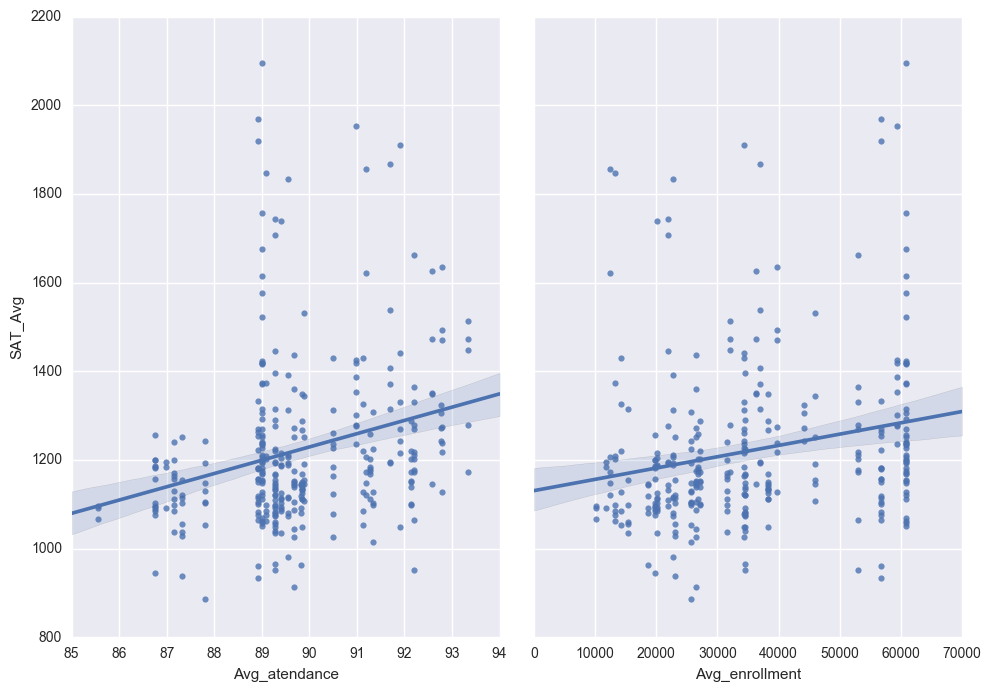

In [126]:
sns.pairplot(sat_size_atte_grade_temp, x_vars=[ 'Avg_atendance',
                                               'Avg_enrollment'],
             y_vars='SAT_Avg', size=7, aspect=0.7, kind='reg')

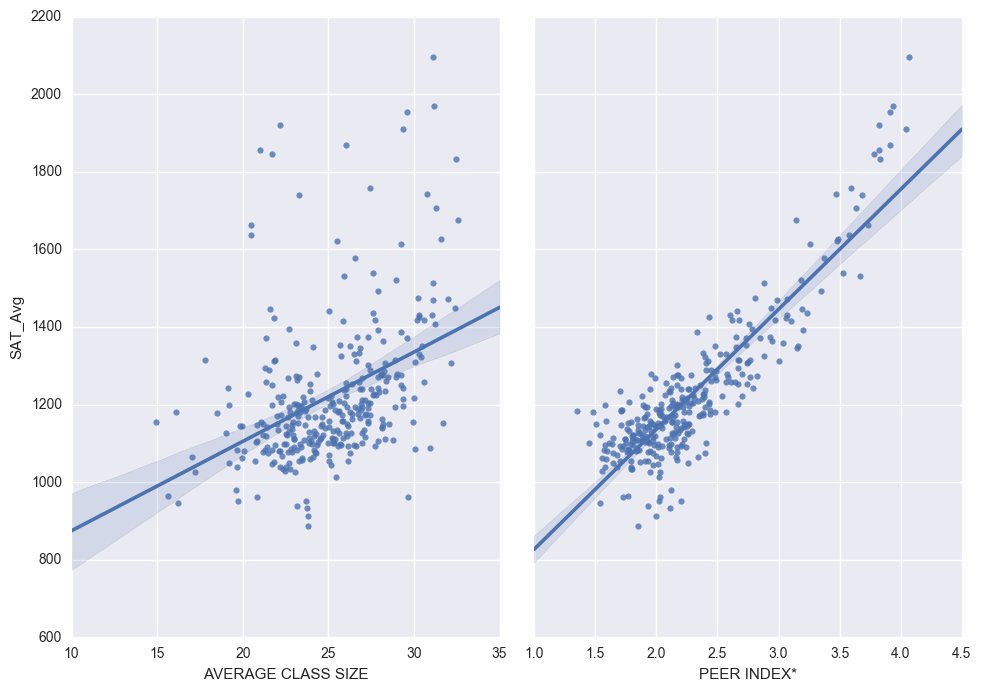

In [127]:
sns.pairplot(sat_size_atte_grade_temp, x_vars=['AVERAGE CLASS SIZE'],
             y_vars='SAT_Avg', size=7, aspect=0.7, kind='reg')

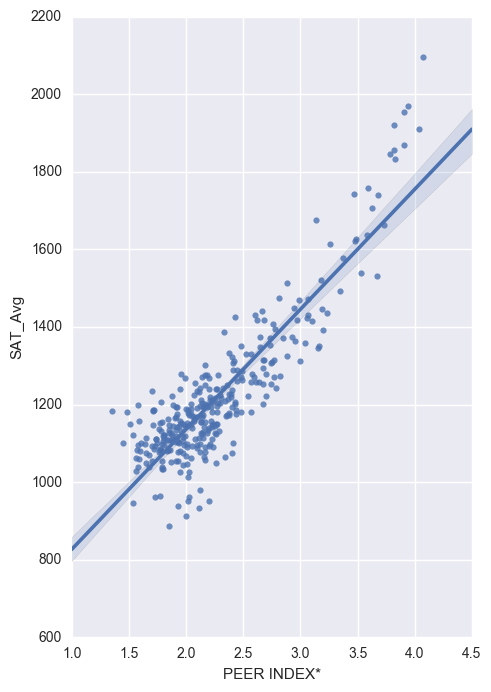

In [244]:
sns.pairplot(sat_size_atte_grade_temp, x_vars=['PEER INDEX*'],
             y_vars='SAT_Avg', size=7, aspect=0.7, kind='reg')

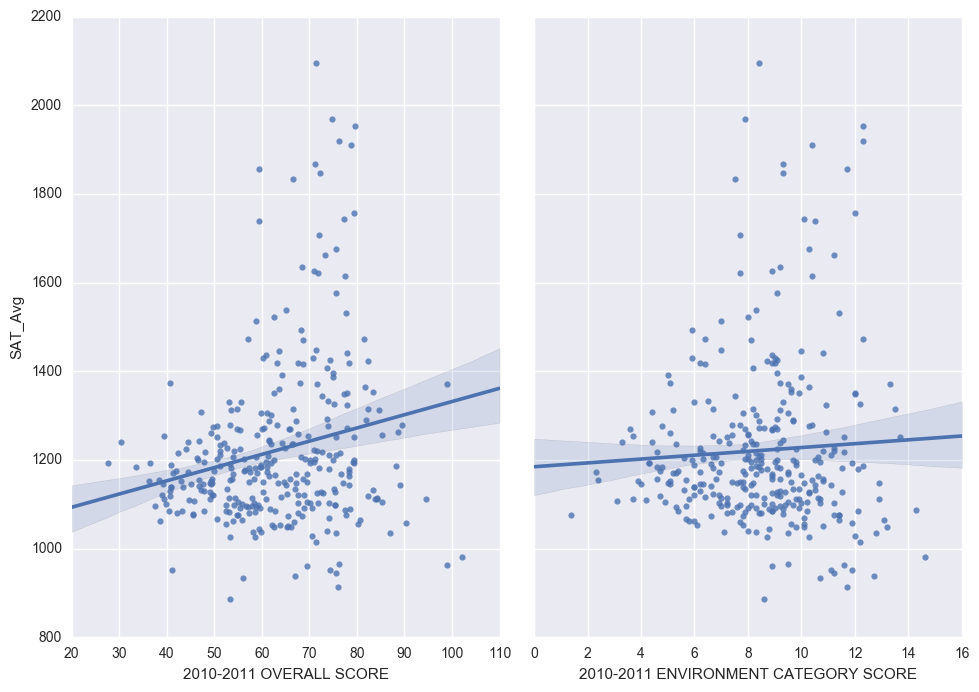

In [128]:
sns.pairplot(sat_size_atte_grade_temp, x_vars=['2010-2011 OVERALL SCORE',
                                               '2010-2011 ENVIRONMENT CATEGORY SCORE'],
             y_vars='SAT_Avg', size=7, aspect=0.7, kind='reg')

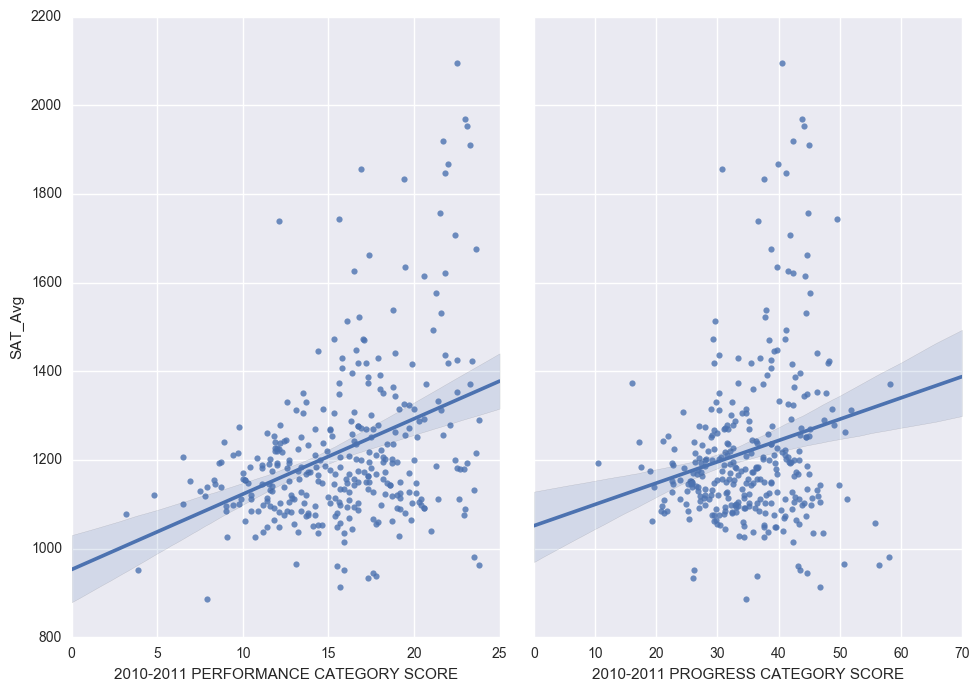

In [129]:
sns.pairplot(sat_size_atte_grade_temp, x_vars=['2010-2011 PERFORMANCE CATEGORY SCORE',
                                               '2010-2011 PROGRESS CATEGORY SCORE'],
             y_vars='SAT_Avg', size=7, aspect=0.7, kind='reg')

# Linear regression

In [130]:
feature_cols = ['AVERAGE CLASS SIZE','Avg_atendance','Avg_enrollment','PEER INDEX*', 
                '2010-2011 OVERALL SCORE','2010-2011 ENVIRONMENT CATEGORY SCORE',
                '2010-2011 PERFORMANCE CATEGORY SCORE','2010-2011 PROGRESS CATEGORY SCORE']

In [131]:
# feature_cols = ['AVERAGE CLASS SIZE', 'PEER INDEX*']


In [132]:
data_feature = sat_size_atte_grade_temp[feature_cols]

In [133]:
data_target = sat_size_atte_grade_temp['SAT_Avg']

In [134]:
data_feature.shape

(323, 8)

In [135]:
data_target.shape

(323,)

In [136]:
type(data_target)

pandas.core.series.Series

In [137]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_feature, data_target, random_state=1)

In [138]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(242, 8)
(242,)
(81, 8)
(81,)


In [139]:


# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [140]:
print(linreg.intercept_)
print(linreg.coef_)

891.957364905
[  8.21178447e+00  -5.94157950e+00   7.80065961e-04   3.01412189e+02
  -2.30211635e+00   2.72194722e+00   3.64812801e+00   1.16816525e-01]


In [141]:
linreg.score(X_train, y_train)

0.80641956439190243

In [142]:
linreg.score(X_test, y_test)

0.83941470683529418

# cross validation


### LinearRegression

In [143]:
linear_reg = LinearRegression()

In [144]:
linreg_scores = cross_val_score(linear_reg, data_feature, data_target, cv=10, scoring='mean_squared_error')

In [145]:
# fix the sign of MSE scores
mse_linreg_scores = -linreg_scores
print(mse_linreg_scores)

[ 10453.8266952    3495.45462057   8154.56288095  10170.04625896
   7613.11300532   6165.5704339    6307.88361624   5282.25782598
   6451.8452196    6172.8039    ]


In [146]:
# convert from MSE to RMSE
rmse_linreg_scores = np.sqrt(mse_linreg_scores)
print(rmse_linreg_scores)

[ 102.24395677   59.12236988   90.30261835  100.84664724   87.2531547
   78.52114641   79.42218592   72.67914299   80.32337904   78.56719354]


In [147]:
# calculate the average RMSE
print(rmse_linreg_scores.mean())

82.9281794831


### BayesianRidge 

In [148]:
from sklearn.linear_model import BayesianRidge

In [149]:
bay_ridge_temp = BayesianRidge()

In [150]:
bay_ridge_temp.fit(X_train, y_train)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

In [151]:
bay_ridge_temp.score(X_train, y_train)

0.80631716958885402

In [152]:
bay_ridge_temp.score(X_test, y_test)

0.84066528679181063

In [153]:
bay_ridge = BayesianRidge()

In [154]:
bay_ridge_scores = cross_val_score(bay_ridge, data_feature, data_target, cv=10, scoring='mean_squared_error')

In [155]:
bay_ridge_scores

array([-10596.43509113,  -3495.67762037,  -8128.00693964, -10151.56365086,
        -7634.17353631,  -6244.89372974,  -6263.38274644,  -5202.09462857,
        -6484.18419282,  -6090.04340097])

In [156]:
# fix the sign of MSE scores
mse_bay_ridge_scores = -bay_ridge_scores
rmse_bay_ridge_scores = np.sqrt(mse_bay_ridge_scores)
rmse_bay_ridge_scores

array([ 102.93898723,   59.12425577,   90.15545984,  100.75496837,
         87.37375771,   79.02464002,   79.14153616,   72.12554768,
         80.52443227,   78.03873013])

In [157]:
rmse_bay_ridge_scores.mean()

82.920231518837952

### LogisticRegression

In [158]:
log_reg = LogisticRegression()

In [159]:
log_reg_temp = LogisticRegression()

In [160]:
log_reg.fit(data_feature, data_target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [161]:
log_reg.score(X_train, y_train)

0.50826446280991733

In [162]:
log_reg.score(X_test, y_test)

0.53086419753086422

In [163]:
data_feature.shape

(323, 8)

In [164]:
?cross_val_score


In [165]:
log_reg_scores = cross_val_score(log_reg_temp, data_feature, data_target, cv=3, scoring='mean_squared_error')

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:516: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=3.
  % (min_labels, self.n_folds)), Warning)


In [166]:
log_reg_scores

array([-49097.54201681, -17582.49275362,  -7804.6875    ])

In [167]:
# fix the sign of MSE scores
mse_log_reg_scores = -log_reg_scores
rmse_log_reg_scores = np.sqrt(mse_log_reg_scores)
rmse_log_reg_scores

array([ 221.57965163,  132.59899228,   88.34414242])

In [168]:
rmse_log_reg_scores.mean()

147.50759544366528

###  Ridge Regression

In [169]:
from sklearn.linear_model import Ridge, RidgeCV

In [170]:
ridgeCV_reg = RidgeCV(alphas=[0.1, 0.5, 1.0, 10.0])

In [171]:
ridgeCV_reg.fit(X_train, y_train)

RidgeCV(alphas=[0.1, 0.5, 1.0, 10.0], cv=None, fit_intercept=True,
    gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [172]:
ridgeCV_reg.alpha_

0.10000000000000001

In [173]:
ridge_reg = Ridge(alpha = .1)

In [174]:
ridge_reg_scores = cross_val_score(ridge_reg, data_feature, data_target, cv=5, scoring='mean_squared_error')

In [175]:
ridge_reg_scores

array([-7606.86912019, -8821.28777826, -6855.50831323, -5889.06450605,
       -6124.54442787])

In [176]:
rmse_ridge_reg_scores = np.sqrt(-ridge_reg_scores)
rmse_ridge_reg_scores.mean()

83.787356818127918

### Lasso

In [177]:
from sklearn.linear_model import Lasso

In [178]:
lasso_reg = Lasso(alpha = 0.1)

In [179]:
lasso_reg_scores = cross_val_score(lasso_reg, data_feature, data_target, cv=5, scoring='mean_squared_error')

In [180]:
lasso_reg_scores

array([-7597.51722833, -8817.44534916, -6854.72009709, -5888.8217944 ,
       -6132.35382132])

In [181]:
rmse_lasso_reg_scores = np.sqrt(-lasso_reg_scores)
rmse_lasso_reg_scores.mean()

83.78124685266279

# Q2: waht is grade of school?
- input: number of students, class size, peer index, SAT score, male number, race
- out put: the grade of school(A, B, C, D, F)

In [182]:
school_grade_final.head()

,DBN,PEER INDEX*,2010-2011 OVERALL GRADE,2010-2011 OVERALL SCORE,2010-2011 ENVIRONMENT CATEGORY SCORE,2010-2011 ENVIRONMENT GRADE,2010-2011 PERFORMANCE CATEGORY SCORE,2010-2011 PERFORMANCE GRADE,2010-2011 PROGRESS CATEGORY SCORE,2010-2011 PROGRESS GRADE,2010-2011 ADDITIONAL CREDIT,2009-10 PROGRESS REPORT GRADE
14,01M292,1.81,C,49.8,6.9,D,12.8,C,30.1,C,NaN,D
23,01M448,2.03,C,57.6,6.9,D,13.9,C,35.8,B,1.0,C
25,01M450,2.26,A,77.0,12.9,A,18.4,A,38.7,B,7.0,A
27,01M509,1.78,C,54.0,6.7,D,15.7,B,30.6,C,1.0,B
30,01M539,3.48,A,71.9,7.7,C,21.8,A,42.4,A,NaN,B


In [183]:
len(school_grade_final)

426

In [184]:
school_grade_required = school_grade_final[['DBN', '2010-2011 OVERALL GRADE']]

In [185]:
total_students.head()

,DBN,total_students
0,17K548,399.0
1,09X543,378.0
2,09X327,543.0
3,02M280,NaN
4,28Q680,811.0


In [186]:
len(total_students)

435

In [187]:
demographics_final.head()

,DBN,male_per,female_per,asian_per,black_per,hispanic_per,white_per,total_enrollment
3,01M015,59.1,40.9,6.3,29.8,59.1,2.8,252
10,01M019,48.0,52.0,12.0,25.5,45.8,9.8,325
17,01M020,48.2,51.8,23.6,9.3,63.4,1.5,593
24,01M034,50.5,49.5,6.6,20.5,69.6,2.1,424
32,01M063,63.8,36.2,9.5,17.1,65.3,7.0,199


In [188]:
sat_size_atte_grade_temp.head()

,DBN,AVERAGE CLASS SIZE,SAT_Avg,District,Avg_atendance,Avg_enrollment,PEER INDEX*,2010-2011 OVERALL SCORE,2010-2011 ENVIRONMENT CATEGORY SCORE,2010-2011 PERFORMANCE CATEGORY SCORE,2010-2011 PROGRESS CATEGORY SCORE
0,01M292,22.564286,1122.0,01,91.18,12367,1.81,49.8,6.9,12.8,30.1
1,01M448,22.231250,1172.0,01,91.18,12367,2.03,57.6,6.9,13.9,35.8
2,01M450,21.200000,1149.0,01,91.18,12367,2.26,77.0,12.9,18.4,38.7
3,01M509,23.571429,1207.0,01,91.18,12367,1.78,54.0,6.7,15.7,30.6
4,01M539,25.510526,1621.0,01,91.18,12367,3.48,71.9,7.7,21.8,42.4


In [189]:
sat_size_peer = sat_size_atte_grade_temp[['DBN', 'AVERAGE CLASS SIZE', 'SAT_Avg', 'PEER INDEX*', '2010-2011 PROGRESS CATEGORY SCORE', ]]

In [190]:
sat_size_peer.head()

,DBN,AVERAGE CLASS SIZE,SAT_Avg,PEER INDEX*,2010-2011 PROGRESS CATEGORY SCORE
0,01M292,22.564286,1122.0,1.81,30.1
1,01M448,22.231250,1172.0,2.03,35.8
2,01M450,21.200000,1149.0,2.26,38.7
3,01M509,23.571429,1207.0,1.78,30.6
4,01M539,25.510526,1621.0,3.48,42.4


In [191]:
len(sat_size_peer)

323

In [192]:
sat_size_peer_students = pd.merge(sat_size_peer, total_students, how='inner', on='DBN')

In [193]:
len(sat_size_peer_students)

306

In [194]:
sat_size_peer_students_demographics = pd.merge(sat_size_peer_students, demographics_final, how='inner', on='DBN')

In [195]:
sat_size_peer_students_demographics.head()

,DBN,AVERAGE CLASS SIZE,SAT_Avg,PEER INDEX*,2010-2011 PROGRESS CATEGORY SCORE,total_students,male_per,female_per,asian_per,black_per,hispanic_per,white_per,total_enrollment
0,01M292,22.564286,1122.0,1.81,30.1,323.0,56.2,43.8,10.0,29.4,56.2,3.0,470
1,01M448,22.231250,1172.0,2.03,35.8,299.0,52.4,47.6,19.3,23.5,47.8,4.3,586
2,01M450,21.200000,1149.0,2.26,38.7,649.0,52.2,47.8,6.2,26.6,59.7,6.0,546
3,01M509,23.571429,1207.0,1.78,30.6,401.0,52.2,47.8,11.8,17.7,68.7,1.8,441
4,01M539,25.510526,1621.0,3.48,42.4,1725.0,48.0,52.0,21.8,11.2,16.6,49.4,1302


In [196]:
len(sat_size_peer_students_demographics)

306

In [197]:
sat_size_peer_students_demographics_grade = pd.merge(school_grade_required, sat_size_peer_students_demographics, how='inner', on='DBN')

In [198]:
len(sat_size_peer_students_demographics_grade)

306

In [199]:
sat_size_peer_students_demographics_grade.head()

,DBN,2010-2011 OVERALL GRADE,AVERAGE CLASS SIZE,SAT_Avg,PEER INDEX*,2010-2011 PROGRESS CATEGORY SCORE,total_students,male_per,female_per,asian_per,black_per,hispanic_per,white_per,total_enrollment
0,01M292,C,22.564286,1122.0,1.81,30.1,323.0,56.2,43.8,10.0,29.4,56.2,3.0,470
1,01M448,C,22.231250,1172.0,2.03,35.8,299.0,52.4,47.6,19.3,23.5,47.8,4.3,586
2,01M450,A,21.200000,1149.0,2.26,38.7,649.0,52.2,47.8,6.2,26.6,59.7,6.0,546
3,01M509,C,23.571429,1207.0,1.78,30.6,401.0,52.2,47.8,11.8,17.7,68.7,1.8,441
4,01M539,A,25.510526,1621.0,3.48,42.4,1725.0,48.0,52.0,21.8,11.2,16.6,49.4,1302


In [200]:
grade_dict = {'A': 1,
              'B': 2,
              'C': 3,
              'D': 4,
              'F': 5,}

In [201]:
grade_number = sat_size_peer_students_demographics_grade.replace(to_replace={'2010-2011 OVERALL GRADE': grade_dict})
# sat_size_peer_students_demographics_grade['2010-2011 OVERALL GRADE'] = sat_size_peer_students_demographics_grade.apply(lambda x: x['2010-2011 OVERALL GRADE'].replace(grade_dict), axis=1)

In [202]:
grade_number.head()

,DBN,2010-2011 OVERALL GRADE,AVERAGE CLASS SIZE,SAT_Avg,PEER INDEX*,2010-2011 PROGRESS CATEGORY SCORE,total_students,male_per,female_per,asian_per,black_per,hispanic_per,white_per,total_enrollment
0,01M292,3,22.564286,1122.0,1.81,30.1,323.0,56.2,43.8,10.0,29.4,56.2,3.0,470
1,01M448,3,22.231250,1172.0,2.03,35.8,299.0,52.4,47.6,19.3,23.5,47.8,4.3,586
2,01M450,1,21.200000,1149.0,2.26,38.7,649.0,52.2,47.8,6.2,26.6,59.7,6.0,546
3,01M509,3,23.571429,1207.0,1.78,30.6,401.0,52.2,47.8,11.8,17.7,68.7,1.8,441
4,01M539,1,25.510526,1621.0,3.48,42.4,1725.0,48.0,52.0,21.8,11.2,16.6,49.4,1302


### Visualizing data for Q2

In [203]:
question_2_feature_cols = ['AVERAGE CLASS SIZE',
                       'SAT_Avg',
                       'PEER INDEX*',
                       'total_students',
                       'male_per',
                       'female_per',
                       'asian_per',
                       'black_per',
                       'hispanic_per',
                       'white_per',
                       'total_enrollment',
                       '2010-2011 PROGRESS CATEGORY SCORE']
question_2_target_cols = ['2010-2011 OVERALL GRADE']

In [204]:
grade_number.dtypes

DBN                                   object
2010-2011 OVERALL GRADE                int64
AVERAGE CLASS SIZE                   float64
SAT_Avg                              float64
PEER INDEX*                          float64
2010-2011 PROGRESS CATEGORY SCORE    float64
total_students                       float64
male_per                             float64
female_per                           float64
asian_per                            float64
black_per                            float64
hispanic_per                         float64
white_per                            float64
total_enrollment                       int64
dtype: object

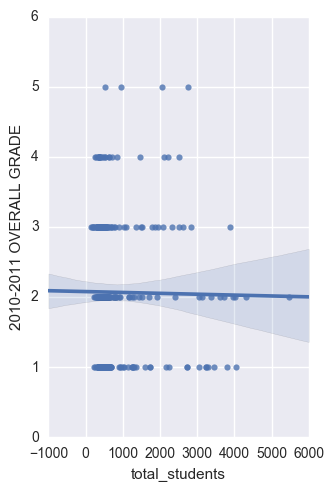

In [252]:
sns.pairplot(grade_number, x_vars=['total_students'],
             y_vars=question_2_target_cols, size=5, aspect=0.7, kind='reg')

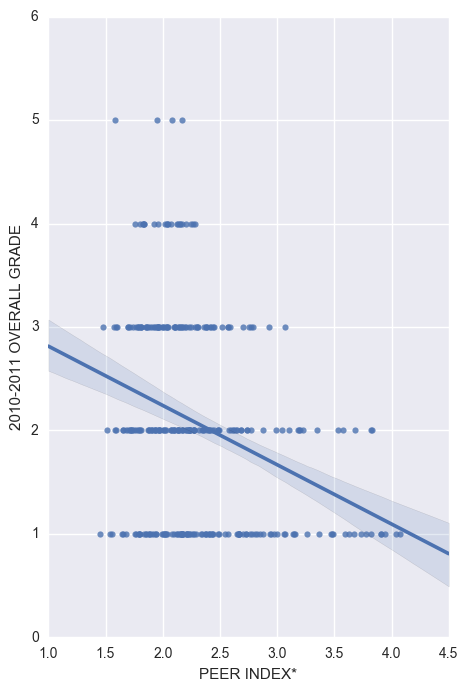

In [253]:
sns.pairplot(grade_number, x_vars=['PEER INDEX*'],
             y_vars=question_2_target_cols, size=7, aspect=0.7, kind='reg')

In [207]:
# ?sns.pairplot

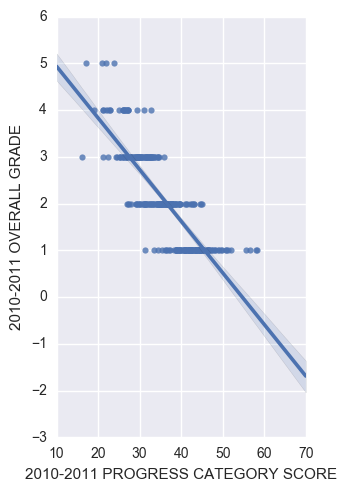

In [254]:
sns.pairplot(grade_number, x_vars=['2010-2011 PROGRESS CATEGORY SCORE'],
             y_vars=question_2_target_cols, size=5, aspect=0.7, kind='reg')

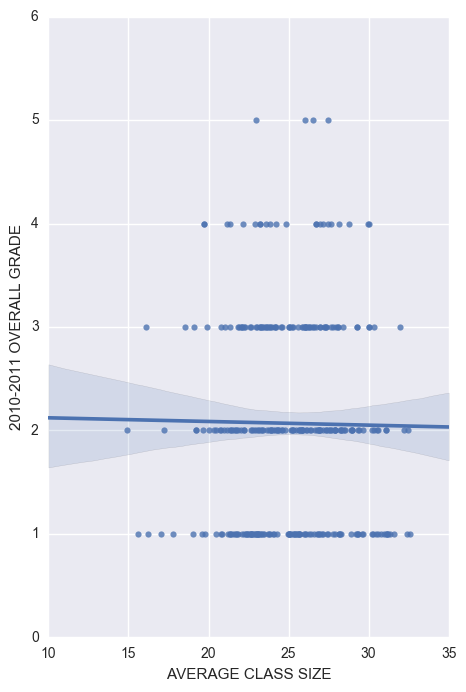

In [255]:
sns.pairplot(grade_number, x_vars=['AVERAGE CLASS SIZE'],
             y_vars=question_2_target_cols, size=7, aspect=0.7, kind='reg')

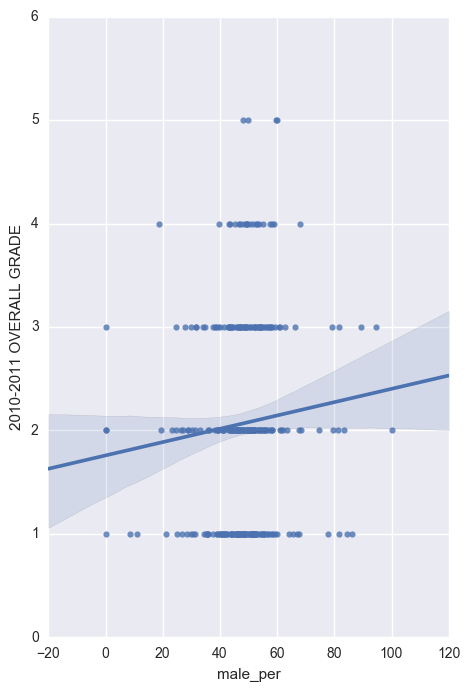

In [256]:
sns.pairplot(grade_number, x_vars=['male_per',],
             y_vars=question_2_target_cols, size=7, aspect=0.7, kind='reg')

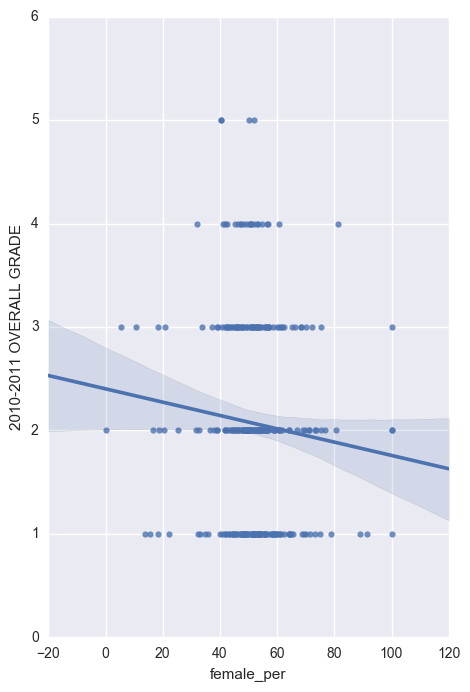

In [257]:
sns.pairplot(grade_number, x_vars=['female_per',],
             y_vars=question_2_target_cols, size=7, aspect=0.7, kind='reg')

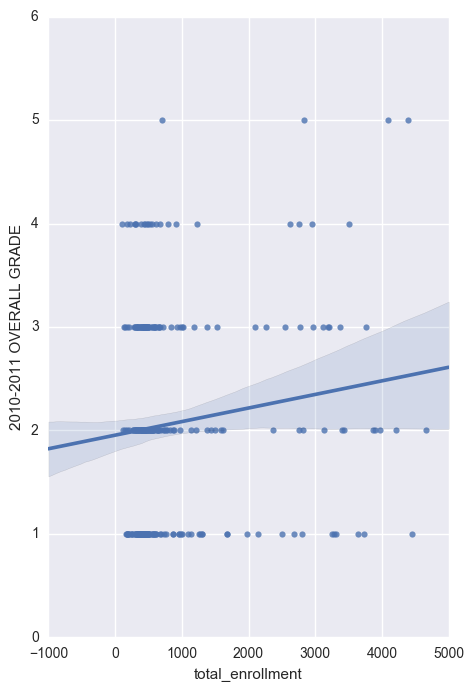

In [258]:
sns.pairplot(grade_number, x_vars=['total_enrollment'],
             y_vars=question_2_target_cols, size=7, aspect=0.7, kind='reg')

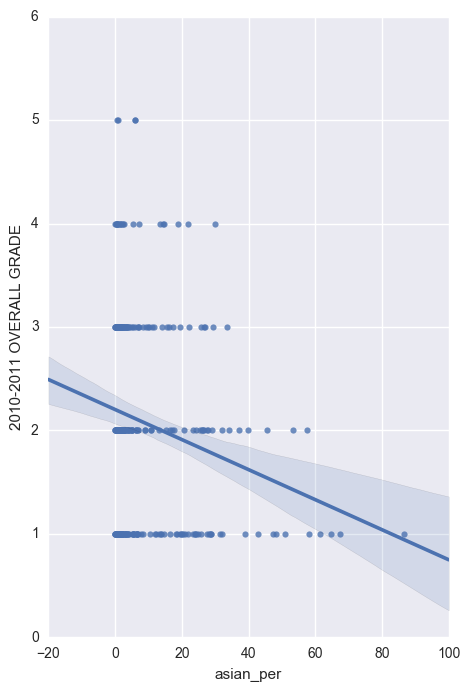

In [259]:
sns.pairplot(grade_number, x_vars=['asian_per'],
             y_vars=question_2_target_cols, size=7, aspect=0.7, kind='reg')

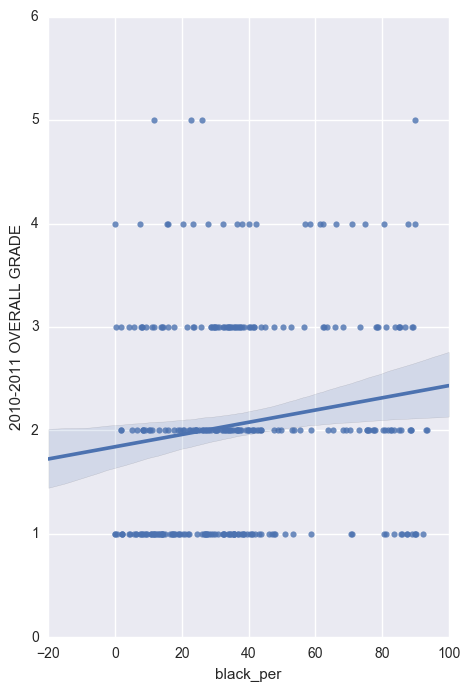

In [260]:
sns.pairplot(grade_number, x_vars=['black_per'],
             y_vars=question_2_target_cols, size=7, aspect=0.7, kind='reg')

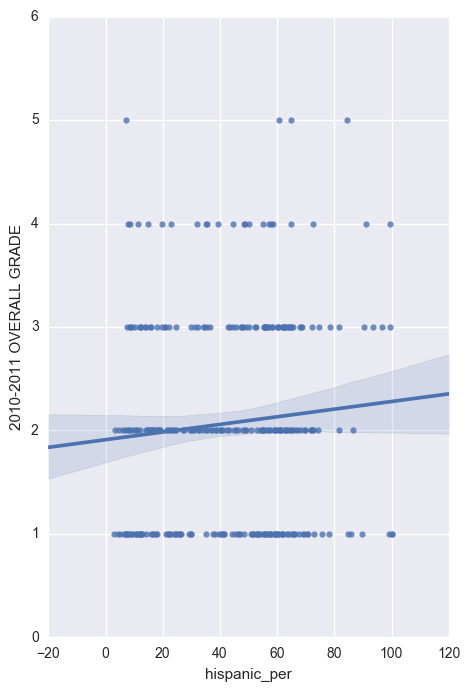

In [261]:
sns.pairplot(grade_number, x_vars=['hispanic_per'],
             y_vars=question_2_target_cols, size=7, aspect=0.7, kind='reg')

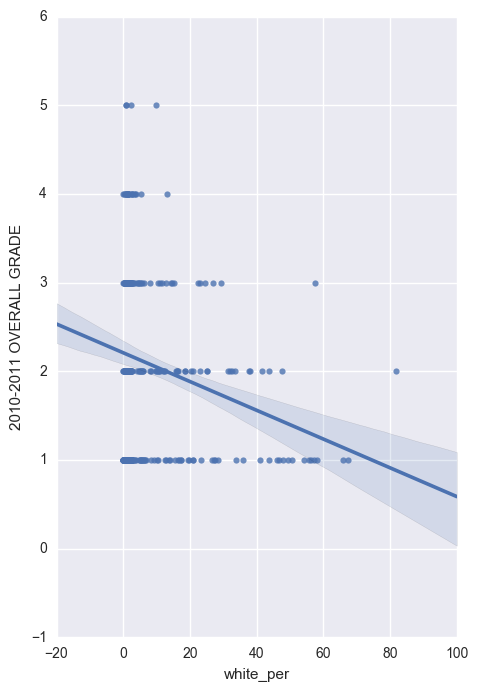

In [262]:
sns.pairplot(grade_number, x_vars=['white_per'],
             y_vars=question_2_target_cols, size=7, aspect=0.7, kind='reg')

### classification

In [212]:
grade_number.head()

,DBN,2010-2011 OVERALL GRADE,AVERAGE CLASS SIZE,SAT_Avg,PEER INDEX*,2010-2011 PROGRESS CATEGORY SCORE,total_students,male_per,female_per,asian_per,black_per,hispanic_per,white_per,total_enrollment
0,01M292,3,22.564286,1122.0,1.81,30.1,323.0,56.2,43.8,10.0,29.4,56.2,3.0,470
1,01M448,3,22.231250,1172.0,2.03,35.8,299.0,52.4,47.6,19.3,23.5,47.8,4.3,586
2,01M450,1,21.200000,1149.0,2.26,38.7,649.0,52.2,47.8,6.2,26.6,59.7,6.0,546
3,01M509,3,23.571429,1207.0,1.78,30.6,401.0,52.2,47.8,11.8,17.7,68.7,1.8,441
4,01M539,1,25.510526,1621.0,3.48,42.4,1725.0,48.0,52.0,21.8,11.2,16.6,49.4,1302


In [213]:
question_2_feature_cols

['AVERAGE CLASS SIZE',
 'SAT_Avg',
 'PEER INDEX*',
 'total_students',
 'male_per',
 'female_per',
 'asian_per',
 'black_per',
 'hispanic_per',
 'white_per',
 'total_enrollment',
 '2010-2011 PROGRESS CATEGORY SCORE']

In [214]:
['SAT_Avg', 'PEER INDEX*', 'female_per','asian_per', 'white_per', '2010-2011 PROGRESS CATEGORY SCORE']

['SAT_Avg',
 'PEER INDEX*',
 'female_per',
 'asian_per',
 'white_per',
 '2010-2011 PROGRESS CATEGORY SCORE']

In [215]:
question_2_feature_data = grade_number[['SAT_Avg', 'PEER INDEX*', 'female_per', 'asian_per', 'white_per', '2010-2011 PROGRESS CATEGORY SCORE']]
question_2_target_data = grade_number['2010-2011 OVERALL GRADE']

In [216]:
question_2_feature_data.shape

(306, 6)

In [217]:
question_2_target_data.shape

(306,)

In [218]:
knn_score=[]
for k in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, question_2_feature_data, question_2_target_data, cv=3, scoring='accuracy').mean()
    knn_score.append(score)


In [219]:
knn_score

[0.46692307692307694,
 0.49013071895424837,
 0.41526646556058316,
 0.46436400201106082,
 0.45468577174459529,
 0.46077677224736052,
 0.38552036199095019,
 0.43776018099547515,
 0.41174459527400703,
 0.41205630970336848,
 0.41872800402212168,
 0.41199849170437403,
 0.41828054298642531,
 0.37584967320261436,
 0.40212921065862245,
 0.36629964806435389,
 0.39892408245349426,
 0.38918552036199094,
 0.38546757164404227]

In [220]:
knn_score_np = np.array(knn_score)

In [221]:
knn_score_np.mean()

0.41926794739488232

In [222]:
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcess

In [223]:
from sklearn.naive_bayes import GaussianNB

In [224]:
svc_linear = SVC(kernel="linear", C=0.025)
svc_nonlin = SVC(gamma=2, C=1)
gaussian_nb = GaussianNB()

In [225]:
score = cross_val_score(svc_linear, question_2_feature_data, question_2_target_data, cv=4, scoring='accuracy').mean()

In [226]:
score

0.67945536919221128

In [227]:
score = cross_val_score(svc_nonlin, question_2_feature_data, question_2_target_data, cv=4, scoring='accuracy').mean()

In [228]:
score

0.34968325534115008

In [229]:
score = cross_val_score(gaussian_nb, question_2_feature_data, question_2_target_data, cv=4, scoring='accuracy').mean()

In [230]:
score

0.57122092819461245

### try peer index

In [231]:
data_school_grade.head()

,﻿DBN,DISTRICT,SCHOOL,PRINCIPAL,PROGRESS REPORT TYPE,SCHOOL LEVEL*,PEER INDEX*,2010-2011 OVERALL GRADE,2010-2011 OVERALL SCORE,2010-2011 ENVIRONMENT CATEGORY SCORE,2010-2011 ENVIRONMENT GRADE,2010-2011 PERFORMANCE CATEGORY SCORE,2010-2011 PERFORMANCE GRADE,2010-2011 PROGRESS CATEGORY SCORE,2010-2011 PROGRESS GRADE,2010-2011 ADDITIONAL CREDIT,2009-10 PROGRESS REPORT GRADE
0,01M015,1,P.S. 015 Roberto Clemente,Irene Sanchez,EMS,Elementary,63.61,C,27.0,6.4,B,2.1,D,18.0,C,0.5,C
1,01M019,1,P.S. 019 Asher Levy,Jacqueline Flanagan,EMS,Elementary,49.48,B,48.7,7.8,B,5.2,D,35.1,A,0.5,C
2,01M020,1,P.S. 020 Anna Silver,James Lee,EMS,Elementary,56.65,B,48.2,7.7,B,7.4,C,31.1,B,2.0,A
3,01M034,1,P.S. 034 Franklin D. Roosevelt,Joyce Stallings Harte,EMS,K-8,67.97,C,39.8,7.5,B,11.3,B,18.5,C,2.5,B
4,01M063,1,P.S. 063 William McKinley,Darlene Despeignes,EMS,Elementary,58.85,B,49.0,8.1,B,10.4,B,29.0,B,1.5,B


In [232]:
school_grade_final.head()

,DBN,PEER INDEX*,2010-2011 OVERALL GRADE,2010-2011 OVERALL SCORE,2010-2011 ENVIRONMENT CATEGORY SCORE,2010-2011 ENVIRONMENT GRADE,2010-2011 PERFORMANCE CATEGORY SCORE,2010-2011 PERFORMANCE GRADE,2010-2011 PROGRESS CATEGORY SCORE,2010-2011 PROGRESS GRADE,2010-2011 ADDITIONAL CREDIT,2009-10 PROGRESS REPORT GRADE
14,01M292,1.81,C,49.8,6.9,D,12.8,C,30.1,C,NaN,D
23,01M448,2.03,C,57.6,6.9,D,13.9,C,35.8,B,1.0,C
25,01M450,2.26,A,77.0,12.9,A,18.4,A,38.7,B,7.0,A
27,01M509,1.78,C,54.0,6.7,D,15.7,B,30.6,C,1.0,B
30,01M539,3.48,A,71.9,7.7,C,21.8,A,42.4,A,NaN,B


In [233]:
data_diretory

,﻿dbn,school_name,boro,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,priority02,priority03,priority04,priority05,priority06,priority07,priority08,priority09,priority10,Location 1
0,17K548,Brooklyn School for Music & Theatre,Brooklyn,K440,718-230-6250,718-230-6262,9,12,NaN,NaN,...,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"883 Classon Avenue\nBrooklyn, NY 11225\n(40.67..."
1,09X543,High School for Violin and Dance,Bronx,X400,718-842-0687,718-589-9849,9,12,NaN,NaN,...,Then to New York City residents who attend an ...,Then to Bronx students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,"1110 Boston Road\nBronx, NY 10456\n(40.8276026..."
2,09X327,Comprehensive Model School Project M.S. 327,Bronx,X240,718-294-8111,718-294-8109,6,12,NaN,NaN,...,Then to Bronx students or residents who attend...,Then to New York City residents who attend an ...,Then to Bronx students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,"1501 Jerome Avenue\nBronx, NY 10452\n(40.84241..."
3,02M280,Manhattan Early College School for Advertising,Manhattan,M520,718-935-3477,NaN,9,10,9,14.0,...,Then to New York City residents who attend an ...,Then to Manhattan students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,"411 Pearl Street\nNew York, NY 10038\n(40.7106..."
4,28Q680,Queens Gateway to Health Sciences Secondary Sc...,Queens,Q695,718-969-3155,718-969-3552,6,12,NaN,NaN,...,Then to Districts 28 and 29 students or residents,Then to Queens students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,"160-20 Goethals Avenue\nJamaica, NY 11432\n(40..."
5,08X348,Schuylerville Preparatory High School,Bronx,X405,718-904-4200,718-935-4209,9,11,9,12.0,...,Then to New York City residents who attend an ...,Then to Bronx students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,"3000 East Tremont Avenue\nBronx, NY 10461\n(40..."
6,14K474,PROGRESS High School for Professional Careers,Brooklyn,K450,718-387-0228,718-782-0911,9,12,NaN,NaN,...,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"850 Grand Street\nBrooklyn, NY 11211\n(40.7119..."
7,02M420,High School for Health Professions and Human S...,Manhattan,M475,212-780-9175,212-979-7261,9,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"345 East 15Th Street\nNew York, NY 10003\n(40...."
8,28Q350,Jamaica Gateway to the Sciences,Queens,Q470,718-480-2689,718-480-2697,9,12,NaN,NaN,...,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"167-01 Gothic Drive\nJamaica, NY 11432\n(40.71..."
9,29Q313,Benjamin Franklin High School for Finance & In...,Queens,Q490,718-935-3645,NaN,9,10,9,12.0,...,Then to New York City residents who attend an ...,Then to Queens students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,"207-01 116th Avenue\nCambria Heights, NY 11411..."


In [234]:
len(data_hs_directory)

33

# Q3: graduation rate

In [235]:
data_graduation.head(50)

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2003,5,s,s,s,s,s,...,s,s,s,s,s,s,s,s,s,s
1,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2004,55,37,67.3%,17,30.9%,45.9%,...,17,30.9%,45.9%,20,36.4%,54.1%,15,27.3%,3,5.5%
2,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2005,64,43,67.2%,27,42.2%,62.8%,...,27,42.2%,62.8%,16,25%,37.200000000000003%,9,14.1%,9,14.1%
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1%,36,46.2%,83.7%,...,36,46.2%,83.7%,7,9%,16.3%,16,20.5%,11,14.1%
4,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006 Aug,78,44,56.4%,37,47.4%,84.1%,...,37,47.4%,84.1%,7,9%,15.9%,15,19.2%,11,14.1%
5,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2001,64,46,71.900000000000006%,32,50%,69.599999999999994%,...,25,39.1%,54.3%,14,21.9%,30.4%,10,15.6%,6,9.4%
6,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2002,52,33,63.5%,19,36.5%,57.6%,...,11,21.2%,33.299999999999997%,14,26.9%,42.4%,16,30.8%,1,1.9%
7,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2003,87,67,77%,39,44.8%,58.2%,...,28,32.200000000000003%,41.8%,28,32.200000000000003%,41.8%,9,10.3%,11,12.6%
8,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2004,112,75,67%,36,32.1%,48%,...,30,26.8%,40%,39,34.799999999999997%,52%,33,29.5%,4,3.6%
9,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2005,121,64,52.9%,35,28.9%,54.7%,...,31,25.6%,48.4%,29,24%,45.3%,41,33.9%,11,9.1%


In [236]:
graduation_temp = data_graduation[data_graduation['Cohort'] == '2006']

In [237]:
graduation_temp.dropna()

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1%,36,46.2%,83.7%,...,36,46.2%,83.7%,7,9%,16.3%,16,20.5%,11,14.1%
10,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2006,124,53,42.7%,42,33.9%,79.2%,...,34,27.4%,64.2%,11,8.9%,20.8%,46,37.1%,20,16.100000000000001%
17,Total Cohort,01M450,EAST SIDE COMMUNITY SCHOOL,2006,90,70,77.8%,67,74.400000000000006%,95.7%,...,67,74.400000000000006%,95.7%,3,3.3%,4.3%,15,16.7%,5,5.6%
24,Total Cohort,01M509,MARTA VALLE HIGH SCHOOL,2006,84,47,56%,40,47.6%,85.1%,...,23,27.4%,48.9%,7,8.300000000000001%,14.9%,25,29.8%,5,6%
31,Total Cohort,01M515,LOWER EAST SIDE PREPARATORY HIGH SCHO,2006,193,105,54.4%,91,47.2%,86.7%,...,22,11.4%,21%,14,7.3%,13.3%,53,27.5%,35,18.100000000000001%
38,Total Cohort,01M539,NEW EXPLORATIONS INTO SCIENCE TECHNO,2006,46,46,100%,46,100%,100%,...,15,32.6%,32.6%,0,0%,0%,0,0%,0,0%
45,Total Cohort,01M650,CASCADES HIGH SCHOOL,2006,89,49,55.1%,36,40.4%,73.5%,...,36,40.4%,73.5%,13,14.6%,26.5%,34,38.200000000000003%,6,6.7%
52,Total Cohort,01M696,BARD HIGH SCHOOL EARLY COLLEGE,2006,139,134,96.4%,134,96.4%,100%,...,134,96.4%,100%,0,0%,0%,4,2.9%,1,0.7%
59,Total Cohort,02M047,47 THE AMERICAN SIGN LANGUAGE AND ENG,2006,25,19,76%,8,32%,42.1%,...,8,32%,42.1%,11,44%,57.9%,4,16%,1,4%
66,Total Cohort,02M288,FOOD AND FINANCE HIGH SCHOOL,2006,102,91,89.2%,77,75.5%,84.6%,...,77,75.5%,84.6%,14,13.7%,15.4%,5,4.9%,3,2.9%


In [238]:
graduation_temp.columns.values

array(['Demographic', 'DBN', 'School Name', 'Cohort', 'Total Cohort',
       'Total Grads - n', 'Total Grads - % of cohort', 'Total Regents - n',
       'Total Regents - % of cohort', 'Total Regents - % of grads',
       'Advanced Regents - n', 'Advanced Regents - % of cohort',
       'Advanced Regents - % of grads', 'Regents w/o Advanced - n',
       'Regents w/o Advanced - % of cohort',
       'Regents w/o Advanced - % of grads', 'Local - n',
       'Local - % of cohort', 'Local - % of grads', 'Still Enrolled - n',
       'Still Enrolled - % of cohort', 'Dropped Out - n',
       'Dropped Out - % of cohort'], dtype=object)

In [239]:
graduation_all_columns = graduation_temp.columns.values

In [240]:
graduation_required_columns = ['DBN','Total Grads - % of cohort',
       'Total Regents - % of cohort', 'Total Regents - % of grads','Advanced Regents - % of cohort',
       'Advanced Regents - % of grads','Regents w/o Advanced - % of cohort',
       'Regents w/o Advanced - % of grads','Local - % of cohort', 'Local - % of grads', 'Still Enrolled - % of cohort',
       'Dropped Out - % of cohort']

In [241]:
graduation_temp = graduation_temp[graduation_required_columns]

In [242]:
graduation_temp.head()

,DBN,Total Grads - % of cohort,Total Regents - % of cohort,Total Regents - % of grads,Advanced Regents - % of cohort,Advanced Regents - % of grads,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - % of cohort,Local - % of grads,Still Enrolled - % of cohort,Dropped Out - % of cohort
3,01M292,55.1%,46.2%,83.7%,0%,0%,46.2%,83.7%,9%,16.3%,20.5%,14.1%
10,01M448,42.7%,33.9%,79.2%,6.5%,15.1%,27.4%,64.2%,8.9%,20.8%,37.1%,16.100000000000001%
17,01M450,77.8%,74.400000000000006%,95.7%,0%,0%,74.400000000000006%,95.7%,3.3%,4.3%,16.7%,5.6%
24,01M509,56%,47.6%,85.1%,20.2%,36.200000000000003%,27.4%,48.9%,8.300000000000001%,14.9%,29.8%,6%
31,01M515,54.4%,47.2%,86.7%,35.799999999999997%,65.7%,11.4%,21%,7.3%,13.3%,27.5%,18.100000000000001%


In [243]:
def remove_per(df, col_name):
    return df[col_name].replace('')

graduation_temp[i] = graduation_temp.apply(remove_per)

TypeError: ("remove_per() missing 1 required positional argument: 'col_name'", 'occurred at index DBN')